### ДЕРЕВЬЯ РЕШЕНИЙ В SKLEARN

In [1]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки

%matplotlib inline
plt.style.use('seaborn')

C:\Users\killr\AppData\Local\Temp\ipykernel_2920\4088794267.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
diabetes_data = pd.read_csv('diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


Ранее мы с вами уже выбрали два наиболее коррелированных с целевой переменной признака: Glucose и BMI. Давайте вспомним, как выглядит диаграмма рассеяния, разделённая по цвету целевой переменной, признаком наличия диабета (Outcome):

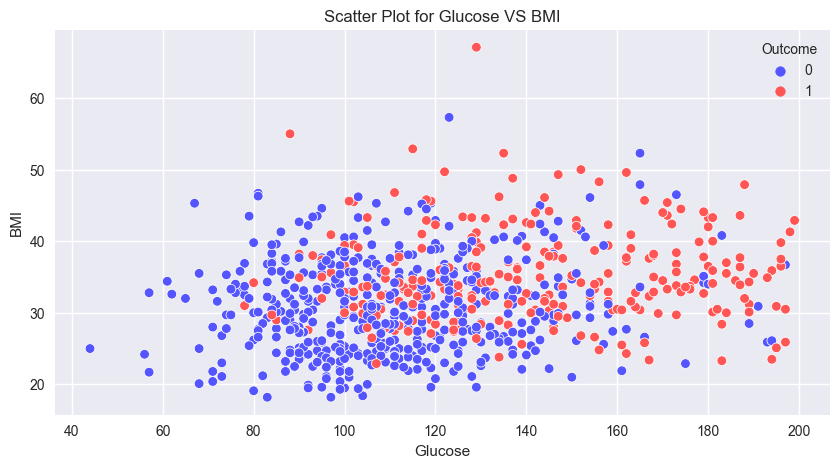

In [3]:
fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);
#Задаём название графика
ax.set_title('Scatter Plot for Glucose VS BMI');

Создадим матрицу наблюдений X из признаков Glucose и BMI и столбец с правильными ответами y из признака Outcome:

In [4]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

**Основные параметры DecisionTreeClassifier**

* criterion — критерий информативности ('gini' — критерий Джини и 'entropy' — энтропия Шеннона).
* max_depth — максимальная глубина дерева (по умолчанию — None, глубина дерева не ограничена).
* max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве (по умолчанию — None, то есть обучение производится на всех признаках). Нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
* min_samples_leaf — минимальное число объектов в листе (по умолчанию — 1). У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те решающие правила, которые верны как минимум для пяти объектов.
* random_state — число, отвечающее за генерацию случайных чисел.

Давайте обучим дерево решений с критерием информативности criterion='entropy' (энтропия Шеннона), максимальной глубиной max_depth=3 и параметром random_state=42.

За обучение, как всегда, отвечает метод fit(). Данный метод реализует построение дерева решений по алгоритму CART, который мы рассматривали выше (алгоритм немного оптимизирован разработчиками sklearn, но смысл ровно тот же).

In [5]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности 
    max_depth=3, #максимальная глубина
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

Итак, мы обучили дерево решений. Обученное дерево можно визуализировать в виде графа, чтобы посмотреть, как дерево делает предсказание. Для этого есть функция plot_tree() из модуля tree.

Основные параметры функции:

* decision_tree — объект обученного дерева решений,
* feature_names — наименования факторов,
* class_names — названия классов,
* filled — добавлять ли расцветку вершин графа.

Вызовем эту функцию:

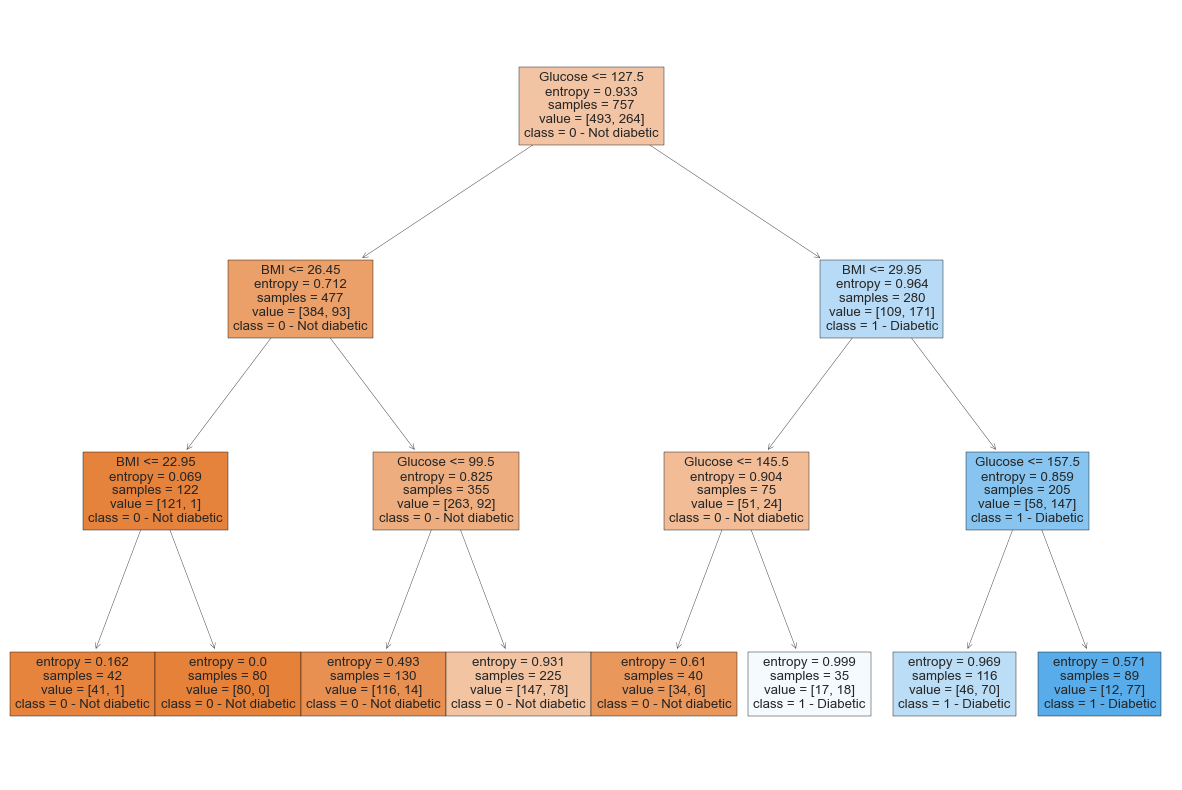

In [6]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф дерева решений
tree.plot_tree(
    dt_clf_2d, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

В каждой из вершин записана следующая информация:

* предикат, по которому происходит разбиение;
* entropy — значение энтропии в текущей выборке;
* samples — количество объектов;
* values — количество объектов каждого из классов;
* class — преобладающий класс, на основе которого будет сделано предсказание.

In [7]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание класса:
y_new_predict = dt_clf_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

Predicted class: [1]


c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


И predict_proba() — для предсказания вероятности принадлежности к каждому из классов:

In [8]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание вероятностей:
y_new_proba_predict = dt_clf_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 3)))

# Predicted probabilities: [[0.135 0.865]]

Predicted probabilities: [[0.135 0.865]]


c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [9]:
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от 40 до 200, BMI — от 10 до 80
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(40, 200, 0.1),
        np.arange(10, 80, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(data=X, x='Glucose', y='BMI', hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


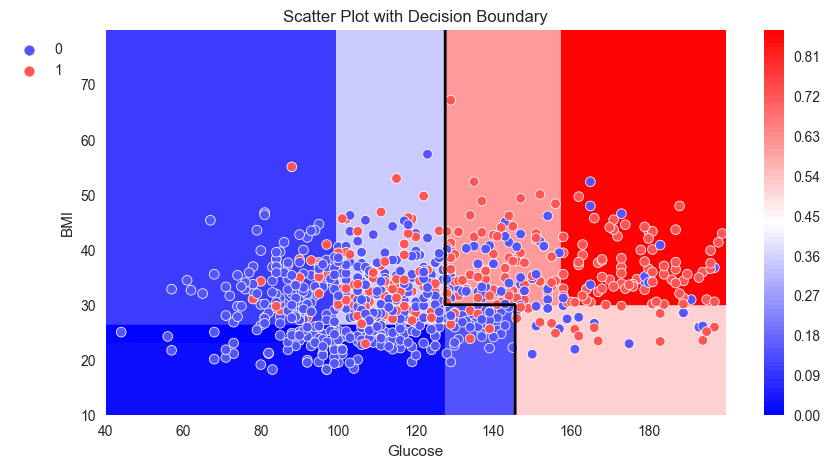

In [10]:
plot_probabilities_2d(X, y, dt_clf_2d)

ак и ожидалось, дерево решений разделило пространство на множество прямоугольных частей, каждая из которых соответствует определённому листу дерева.

Количество этих областей равно количеству листьев — 8.

In [11]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_2d.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.69      0.62      0.65       264

    accuracy                           0.77       757
   macro avg       0.75      0.74      0.74       757
weighted avg       0.77      0.77      0.77       757



Если сравнить данный отчёт с полученным ранее для логистической регрессии, обученной на двух признаках, вы увидите, что даже с небольшой глубиной 3 дерево решений решает задачу классификации лучше, чем логистическая регрессия.

Давайте построим дерево решений без ограничения его максимальной глубины. Для этого нам просто не нужно задавать параметр max_depth:

In [12]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_bad = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART без ограничения его длины
dt_clf_bad.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [13]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_bad.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       493
           1       1.00      0.97      0.98       264

    accuracy                           0.99       757
   macro avg       0.99      0.98      0.99       757
weighted avg       0.99      0.99      0.99       757



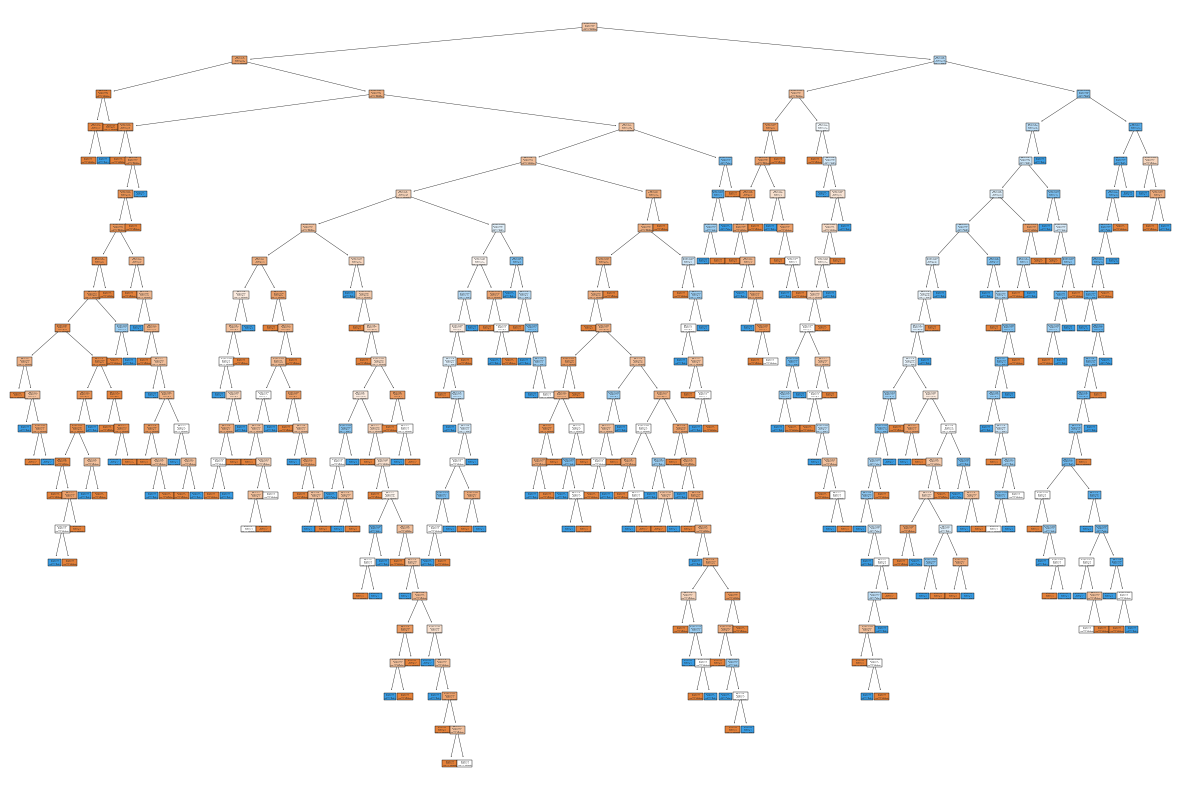

In [14]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф 
tree_graph = tree.plot_tree(
    dt_clf_bad, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

In [15]:
dt_clf_bad.get_depth()

22

c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


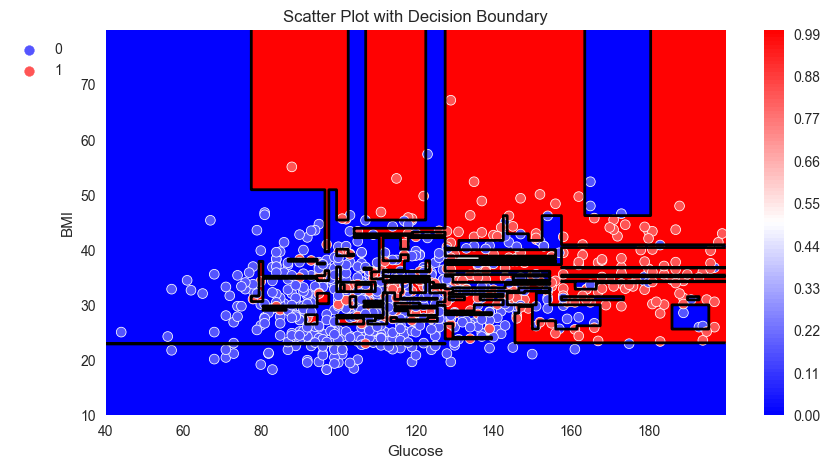

In [16]:
plot_probabilities_2d(X, y, dt_clf_bad)

Перед нами типичная картина переобучения дерева решений. Дерево решений разделило пространство на огромное количество отдельных частей, чтобы обозначить все точки из обучающего набора данных правильным классом (уменьшить энтропию до нуля).

Конечно же, такая модель не имеет никакой обобщающей способности и никому не нужна.

Давайте попробуем обучить дерево решений на всех признаках. Принцип остаётся тем же, меняется только матрица наблюдений X:

In [17]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [18]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       493
           1       0.84      0.69      0.76       264

    accuracy                           0.85       757
   macro avg       0.84      0.81      0.82       757
weighted avg       0.84      0.85      0.84       757



Важность признаков можно посмотреть, обратившись к атрибуту feature_importance_:

In [20]:
print(dt_clf_full.feature_importances_)


[0.02675774 0.36675873 0.03368236 0.04553664 0.24588118 0.14137465
 0.14000868]


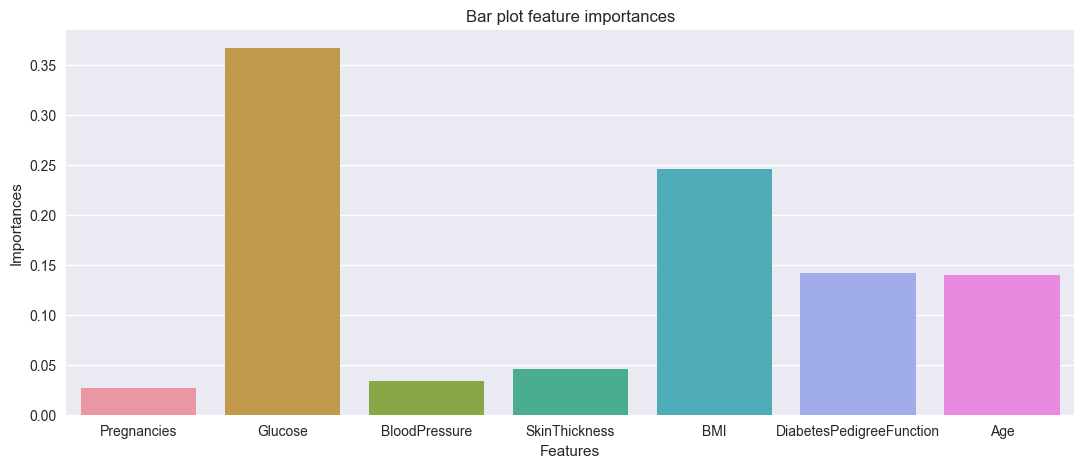

In [21]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = dt_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

In [ ]:
#Задание 5.10

#Для выполнения задания используйте датасет о диабете из данного модуля. Для обучения используйте все доступные признаки.

#Обучите дерево решений с максимальной глубиной 6 и критерием информативности Джини. 
# В качестве значения параметра random_state возьмите число 42.

#Сделайте предсказание и рассчитайте F1-меру.

#Чему равно значение метрики? Ответ запишите с точностью до второго знака после точки-разделителя.

In [22]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='gini', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       493
           1       0.85      0.73      0.78       264

    accuracy                           0.86       757
   macro avg       0.85      0.83      0.84       757
weighted avg       0.86      0.86      0.86       757



### ДОСТОИНСТВА И НЕДОСТАТКИ ДЕРЕВЬЕВ РЕШЕНИЙ

**Плюсы**
* Дерево решений не требует нормализации/стандартизации данных.
* Наличие пропусков не оказывает существенного влияния на построение дерева.
* За счёт своей простоты модель деревьев решений интуитивно понятна и легко объяснима даже людям, не разбирающимся в методе.
* Приятный побочный эффект построения дерева решений — получение значимости признаков. Однако коэффициенты значимости целиком и полностью зависят от сложности дерева.

**Минусы**
* В силу дискретной топологической структуры дерево не дифференцируется по параметрам: стандартные алгоритмы поиска параметров, такие как градиентный спуск, не работают. Приходится использовать полный перебор.
* Так как метод является жадным, он долго обучается из-за полного перебора. Требует затрат больших вычислительных мощностей (по сравнению с другими алгоритмами). Особенно это ощутимо при большом количестве признаков на глубоких деревьях.
* Очень сильная склонность к переобучению. Необходим подбор внешних параметров: max_depth, min_sample_leaf и другие (о том, как организовать этот подбор, мы поговорим в отдельном модуле).
* Небольшое изменение в данных может заметно повлиять на структуру дерева.
* При работе с непрерывными числовыми признаками дерево делит их на категории и теряет информацию. Лучше всего дерево работает, если перевести числовые признаки в категориальные.

### Введение в ансамбли: бэггинг. Случайный лес

Ансамблевые модели или просто ансамбли (ensembles) — это метод машинного обучения, где несколько простых моделей (часто называемых «слабыми учениками») обучаются для решения одной и той же задачи и объединяются для получения лучших результатов.

Необходимость использования ансамблей может возникнуть тогда, когда вы уже нашли хорошую модель и никак больше не можете повысить её качество. В этом случае можно перейти к более продвинутому методу: использовать не одну модель (пусть и очень хорошую), а ансамбли моделей.

Существует три проверенных способа построения ансамблей:

* Бэггинг — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
* Бустинг — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
* Стекинг — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение.

### БЭГГИНГ. ОСНОВНЫЕ ИДЕИ

Бэггинг (bagging) — это алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

В основе алгоритма лежит статистический метод, который называется бутстрэпом (bootstrap). Идея бутстрэпа заключается в генерации k  выборок размера n (бутстрэп-выборок) из исходного набора данных размера m путём случайного выбора элементов с повторениями в каждом из наблюдений. 

Когда мы будем разбирать математическое обоснование ансамблей, мы докажем следующие два утверждения:

* Смещение (bias) бэггинг-ансамбля не больше () смещения одного алгоритма из этого ансамбля.
* Однако разброс (variance) бэггинг-ансамбля в k раз меньше, чем разброс одного алгоритма из ансамбля, где k — количество алгоритмов в ансамбле.

Теорема гарантирует, что средняя ошибка ансамбля, построенного по принципу бэггинга, не выше, чем средняя ошибка базовой модели, но при этом шанс переобучения алгоритма значительно ниже.

### СЛУЧАЙНЫЙ ЛЕС

Случайный лес (Random Forest) — это самая распространённая реализация бэггинга, основанная на использовании в качестве базовой модели дерева решений. 

АЛГОРИТМ ПОСТРОЕНИЯ СЛУЧАЙНОГО ЛЕСА ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ

Пусть количество объектов в наборе данных равно N, а количество признаков — M. То есть размер набора данных — (N, M). Количество деревьев в лесу равно K. Тогда для обучения случайного леса необходимо выполнить следующие шаги:

* С помощью бутстрэпа создать K наборов данных размера (N, M).
* Для каждого сгенерированного набора данных применить метод случайных подпространств: выбрать L < M случайных признаков и получить K новых наборов данных размером (N, L).
* На каждом наборе данных обучить K деревьев решений.
* Когда поступят новые данные, нам нужно будет прогнать их через каждое дерево и объединить результаты отдельных деревьев мажоритарным голосованием или путём комбинирования вероятностей.

### СЛУЧАЙНЫЙ ЛЕС В SKLEARN

In [23]:
from sklearn import ensemble

In [24]:
diabetes_data = pd.read_csv('diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


По традиции сначала построим модель на двух признаках (Glucose и BMI) и посмотрим, как будет выглядеть разделяющая поверхность случайного леса.

In [25]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

Основные параметры RandomForestClassifier

* n_estimators — количество деревьев в лесу (число K из бэггинга; по умолчанию равно 100);
* criterion — критерий информативности разбиения для каждого из деревьев ('gini' — критерий Джини и 'entropy' — энтропия Шеннона; по умолчанию — 'gini');
* max_depth — максимальная глубина одного дерева (по умолчанию — None, то есть глубина дерева не ограничена);
* max_features — максимальное число признаков, которые будут использоваться каждым из деревьев (число L из метода случайных подпространств; по умолчанию — 'sqrt'; для обучения каждого из деревьев используется $\sqrt{m}$ признаков, где m — число признаков в начальном наборе данных);
* min_samples_leaf — минимальное число объектов в листе (по умолчанию — 1);
* random_state — параметр, отвечающий за генерацию случайных чисел.

In [26]:
#Создаём объект класса RandomForestClassifier
rf_clf_2d = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=3, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_2d.fit(X, y)
 
#Делаем предсказание класса
y_pred = rf_clf_2d.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       493
           1       0.73      0.57      0.64       264

    accuracy                           0.78       757
   macro avg       0.76      0.73      0.74       757
weighted avg       0.77      0.78      0.77       757



c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


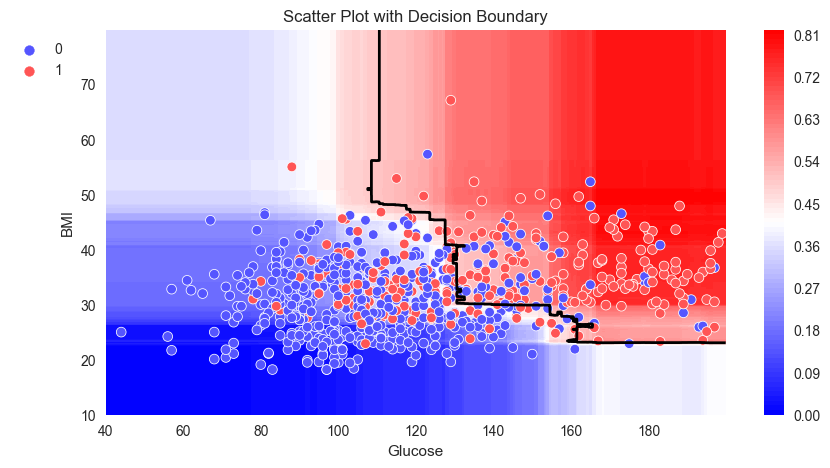

In [27]:
plot_probabilities_2d(X, y, rf_clf_2d)

А теперь используем для предсказания все признаки из набора данных:

In [28]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
 
 
#Создаём объект класса RandomForestClassifier
rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=300, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=6, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = rf_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       493
           1       0.85      0.77      0.80       264

    accuracy                           0.87       757
   macro avg       0.86      0.85      0.85       757
weighted avg       0.87      0.87      0.87       757



Если мы захотим предсказывать не классы, а вероятности, чтобы, например, подобрать оптимальный порог вероятности, то сработает уже знакомый нам метод predict_proba():

In [29]:
rf_clf_full.predict_proba(X)

array([[0.7186633 , 0.2813367 ],
       [0.85222366, 0.14777634],
       [0.88358167, 0.11641833],
       ...,
       [0.28908312, 0.71091688],
       [0.44280536, 0.55719464],
       [0.94476689, 0.05523311]])

Однако так как случайный лес основан на деревьях решения, у него также есть атрибут feature_importances_, в котором находится коэффициенты важности каждого из признаков. Давайте построим столбчатую диаграмму, иллюстрирующую показатели важности для каждого признака.

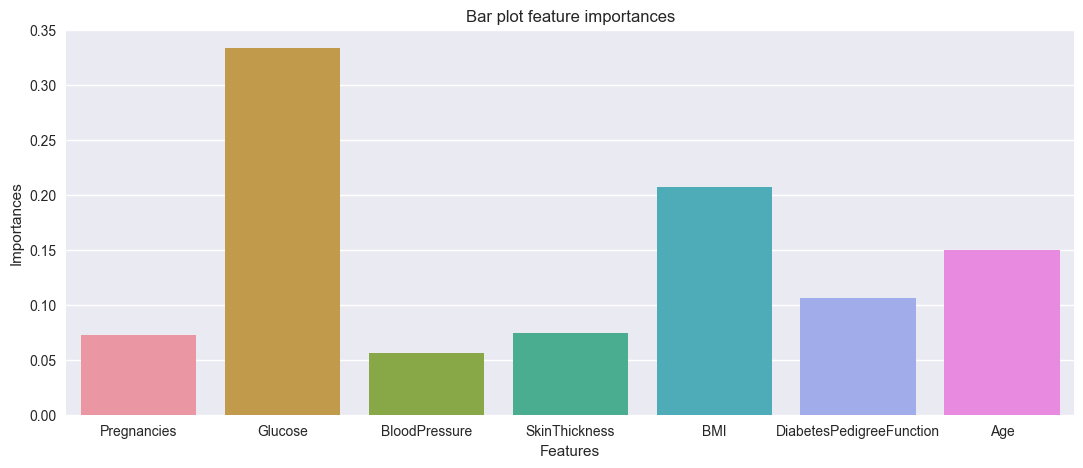

In [33]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = rf_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

In [ ]:
#Задание 6.5
#Скачайте набор данных о винах. Вам необходимо будет предсказать качество вина по его характеристикам.

#Для начала подготовим данные к бинарной классификации. Условно разделим вино на хорошее и плохое. 
# Хорошим вином будем называть вино, параметр quality которого >= 6, плохим — всё остальное.

In [34]:
wine_data = pd.read_csv('winequality-red.csv', sep=';')
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x>=6 else 0)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Обучите на тренировочной выборке (X_train, y_train) модель случайного леса, состоящего из 500 деревьев. 
# Максимальная глубина каждого из деревьев — 8. Минимальное число объектов в листе — 10. 
# В качестве критерия информативности используйте критерий Джини. 
# Количество признаков, на которых обучается каждое из деревьев, возьмите как корень m, где m  — общее количество признаков. 
# В качестве значения параметра random_state возьмите число 42.

#Сделайте предсказание качества вина для тренировочного и тестового наборов данных.

#Рассчитайте метрику accuracy для каждого набора и запишите её в качестве ответа с точностью до двух знаков после точки-разделителя.

In [38]:
rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='gini', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42, #генератор случайных чисел
    min_samples_leaf=10
)
#Обучаем модель 
rf_clf_full.fit(X_train, y_train)
 
#Делаем предсказание класса
y_train_pred = rf_clf_full.predict(X_train)
#Выводим отчёт о метриках
print(metrics.classification_report(y_train, y_train_pred))

#Делаем предсказание класса в тестовой выборке
y_test_pred = rf_clf_full.predict(X_test)
#Выводим отчёт о метриках
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       603
           1       0.87      0.84      0.85       676

    accuracy                           0.85      1279
   macro avg       0.85      0.85      0.85      1279
weighted avg       0.85      0.85      0.85      1279

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       141
           1       0.79      0.75      0.77       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

